DATASCI217: Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
usa = pd.read_csv('ddf--datapoints--population--by--country-usa--age--gender--year.csv')
canada = pd.read_csv('ddf--datapoints--population--by--country-can--age--gender--year.csv')
india = pd.read_csv('ddf--datapoints--population--by--country-ind--age--gender--year.csv')
china = pd.read_csv('ddf--datapoints--population--by--country-chn--age--gender--year.csv')
ukraine = pd.read_csv('ddf--datapoints--population--by--country-ukr--age--gender--year.csv')

df = pd.concat([usa, canada, india, china, ukraine])

Part 1: Matplotlib

1. Create a line plot comparing total population over time:
   - Choose 5 countries
   - Calculate the total population by country for each year
   - Create a line plot showing population trends
   - Include a legend identifying each country
   - Add appropriate axis labels and title
   - Use different line styles or colors to distinguish the countries

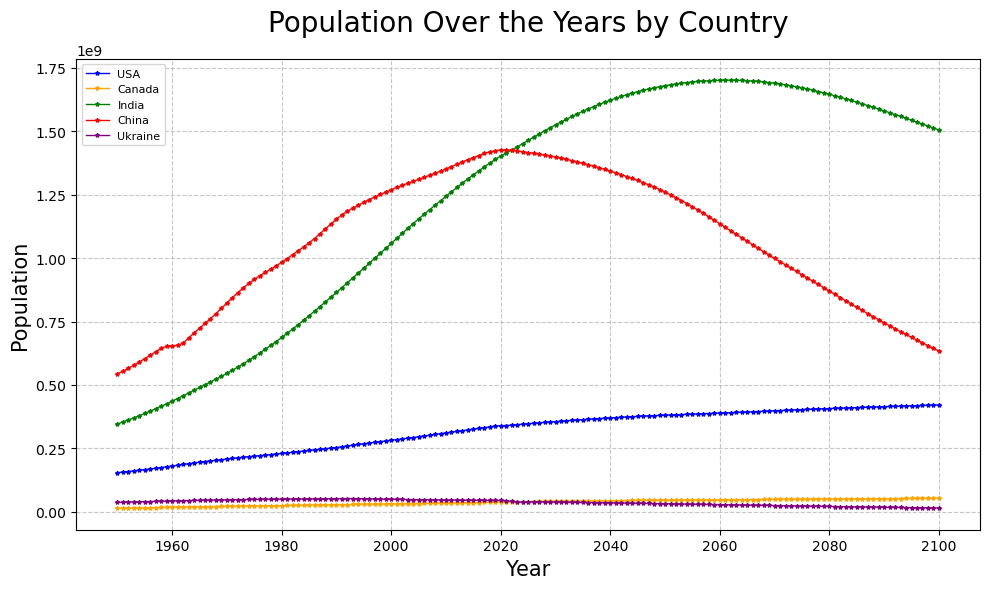

In [7]:
# total population by country for each year
year_usa = usa.groupby('year')['population'].sum().reset_index()
year_canada = canada.groupby('year')['population'].sum().reset_index()
year_india = india.groupby('year')['population'].sum().reset_index()
year_china = china.groupby('year')['population'].sum().reset_index()
year_ukraine = ukraine.groupby('year')['population'].sum().reset_index()

# create figure and axis
plt.figure(figsize = (10, 6))

# create line plot

# plot usa
plt.plot(year_usa['year'], year_usa['population'], 
         marker='*', linestyle='-', color='blue', 
         linewidth=1, markersize=3, label='USA')
# plot canada
plt.plot(year_canada['year'], year_canada['population'], 
         marker='*', linestyle='-', color='orange', 
         linewidth=1, markersize=3, label='Canada')
# plot india
plt.plot(year_india['year'], year_india['population'], 
         marker='*', linestyle='-', color='green', 
         linewidth=1, markersize=3, label='India')
# plot china
plt.plot(year_china['year'], year_china['population'], 
         marker='*', linestyle='-', color='red', 
         linewidth=1, markersize=3, label='China')
# plot ukraine
plt.plot(year_ukraine['year'], year_ukraine['population'], 
         marker='*', linestyle='-', color='purple', 
         linewidth=1, markersize=3, label='Ukraine')

# customize the plot
plt.title('Population Over the Years by Country', fontsize=20, pad=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Population', fontsize=15)
plt.grid(True, linestyle='--', alpha=0.7)

# add legend
plt.legend(fontsize=8)

# show plot
plt.tight_layout()
plt.show()

2. Investigate demographic shifts using a stacked bar chart:
   - Compare age distributions (0-14, 15-30, 31-45, 46-65, 66+) between 1950, 1985, and 2020
   - Create a stacked bar chart showing these changes
   - Calculate and display the percentage for each age group
   - Add text annotations showing key percentages
   - Include clear labels and a legend

/var/folders/zx/z2tjr_791nb_d_97gp385rs40000gn/T/ipykernel_16390/3859908139.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = bin_labels, right=False)


<Figure size 1000x600 with 0 Axes>

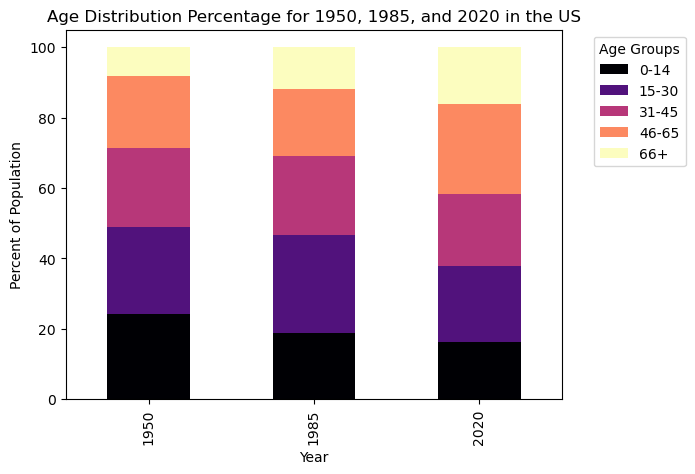

In [19]:
# age distributions between 1950, 1985, 2020
bins = [1, 14, 30, 45, 65, 100]
bin_labels = ['0-14', '15-30', '31-45', '46-65', '66+']
years = [1950, 1985, 2020]

usa = pd.read_csv('ddf--datapoints--population--by--country-usa--age--gender--year.csv')
df_filter = usa[usa['year'].isin(years)]

# add a new column called age group
df_filter['age_group'] = pd.cut(df_filter['age'], bins = bins, labels = bin_labels, right=False)

age_dist = df_filter.groupby(['year', 'age_group'])['population'].sum().unstack()

# population in each age group
age_total = age_dist.sum(axis = 1)
percent = age_dist.apply(lambda row: row / age_total[row.name] * 100, axis=1)

# create figure and axis
plt.figure(figsize = (10, 6))

# create stacked bar plot
ax = percent.plot(kind='bar', stacked=True, colormap='magma')
plt.title('Age Distribution Percentage for 1950, 1985, and 2020 in the US')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Part 2: Seaborn

1. Create a heatmap showing the population distribution across age groups (0-14, 15-30, 31-45, 46-65, 66+) and country for 5 countries of your choice in a specific year.
   - Use seaborn's heatmap function
   - Add clear annotations and labels
   - Write a brief explanation of what the heatmap reveals about the population structure

2. Create a pair of violin plots comparing the age distributions between two countries in 2020, separated by gender.
   - Create side-by-side violin plots using seaborn
   - Add clear labels and a title
   - Write a brief comparison of what the plots reveal

3. Create a pairplot comparing population metrics across four countries:
   - Select four countries of your choice
   - Include all variables in the dataset
   - Use the country as the hue parameter to distinguish between countries
   - Write a brief summary of any patterns or relationships revealed by the pairplot